In [5]:
import pandas as pd
import numpy as np
import re
import ast 
from time import process_time
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import joblib
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [2]:
# ---------------------------------------------- ONLY CLEANED DATA ----------------------------------------------

In [2]:
path = "../dataset/original-dataset/marathi-training-data.csv"
data = pd.read_csv(path)
data

,text,label
0,"प्रा . प्रताप हरिदास : होय , मला वाटते की हा ए...",com_tech
1,"तर , विशिष्ट गोष्टींद्वारे , ठराविक कायद्यांद्...",bioche
2,- - - - - - - - - - - - - - - - - - - - - - - ...,cse
3,"तर , आपला अर्धा चिन्ह 9 वाजता असेल .",phy
4,"म्हणून , मी असे म्हणालो की जर शेकडो , हजारो कि...",phy
...,...,...
41992,"जरी आपण डेटा कूटबद्ध केला , तरीही हा मुख्य व्य...",cse
41993,"ते म्हणतात - "" ज्याला पाहण्यासाठी डोळे , ऎकण्य...",com_tech
41994,"प्रथम क्रोनोलॉजिकल , क्रॉनोलॉजी म्हणजे आपल्याल...",com_tech
41995,"त्या थोड्या तपशीलावर येईल , जेणेकरून संपूर्ण ग...",bioche


In [6]:
def clean_text(text):
    #Removing unprintable characters
    text = ''.join(x for x in text if x.isprintable())

    # Cleaning the urls
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Cleaning the html elements
    text = re.sub(r'<.*?>', '', text)

    # Removing the punctuations
    text = re.sub('[!#?,.:";-@#$%^&*_~<>()-]', '', text)
    
    text = [word.lower() for word in text.split()]

    return text

In [9]:
corpus = [clean_text(text) for text in data.text.values.tolist()]
corpus[0]

['प्रा',
 'प्रताप',
 'हरिदास',
 'होय',
 'मला',
 'वाटते',
 'की',
 'हा',
 'एक',
 'महत्त्वाचा',
 'मुद्दा',
 'आहे',
 'की',
 'भारतीय',
 'संदर्भामुळे',
 'आपण',
 'विशेषतः',
 'आमच्या',
 'शैक्षणिक',
 'प्रक्रियेद्वारे',
 'प्रवेश',
 'करू',
 'शकता',
 'जिथे',
 'प्रवेश',
 'परीक्षा',
 'असते',
 'आणि',
 'जी',
 'आपल्याला',
 'विभागांमध्ये',
 'ठेवते',
 'आणि',
 'काही',
 'आपण',
 'त्या',
 'विशिष्ट',
 'क्रियाकलापांवर',
 'अडकले',
 'आहात',
 'असे',
 'कसे',
 'वाटते']

In [13]:
dict_corpus = Dictionary(corpus)
len(dict_corpus)

52585

In [14]:
dict_corpus.filter_extremes(no_below=3, no_above=0.3, keep_n=None)
len(dict_corpus)

16440

In [15]:
bow_corpus = [dict_corpus.doc2bow(c) for c in corpus]
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 2),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1)]

In [8]:
limit=22
start=2
step=2

In [9]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, coherence='c_v'):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())
        print("Done for model with topics ", num_topics)
    return model_list, coherence_values

In [10]:
model_list, coherence_values = compute_coherence_values(dictionary=dict_corpus, 
                                                        corpus=bow_corpus, 
                                                        texts=corpus, 
                                                        start=start, limit=limit, step=step)

Done for model with topics  2
Done for model with topics  4
Done for model with topics  6
Done for model with topics  8
Done for model with topics  10
Done for model with topics  12
Done for model with topics  14
Done for model with topics  16
Done for model with topics  18
Done for model with topics  20


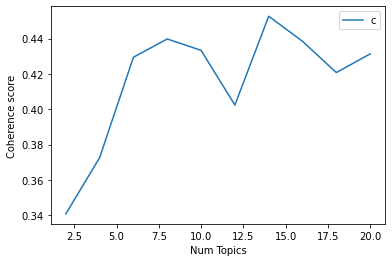

In [11]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
topic = 2
for score in coherence_values:
    print("Topic: {}, coherence: {}".format(topic, score))
    topic+=2

Topic: 2, coherence: 0.340795954893545
Topic: 4, coherence: 0.3725872750209937
Topic: 6, coherence: 0.4294471288511335
Topic: 8, coherence: 0.43978437568881545
Topic: 10, coherence: 0.43334696150309754
Topic: 12, coherence: 0.40239871098329855
Topic: 14, coherence: 0.45263860421997765
Topic: 16, coherence: 0.43845824429738556
Topic: 18, coherence: 0.42077155867629934
Topic: 20, coherence: 0.43134106639175374


In [ ]:
model_name = "../models/LDA/TechDofication.mr.LDA.original.raw.t4.pkl"
joblib.dump(model_name[3], model_name)

In [13]:
lda_visualization = pyLDAvis.gensim.prepare(model_list[2], bow_corpus, dict_corpus, sort_topics=False)
pyLDAvis.display(lda_visualization)

In [14]:
# ------------------------------------ LDA Mallet Implementation ------------------------------------

In [15]:
mallet_path = "../mallet-2.0.8/bin/mallet"

In [16]:
def compute_mallet_coherence_values(mallet_path, dictionary, corpus, texts, limit, start=2, step=3, coherence='c_v'):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model= gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())
        print("Done for model with topics ", num_topics)
    return model_list, coherence_values

In [17]:
mallet_model_list, mallet_coherence_values = compute_mallet_coherence_values(mallet_path=mallet_path,
                                                                             dictionary=dict_corpus, 
                                                                             corpus=bow_corpus, 
                                                                             texts=corpus, 
                                                                             start=start, limit=limit, step=step)

Done for model with topics  2
Done for model with topics  4
Done for model with topics  6
Done for model with topics  8
Done for model with topics  10
Done for model with topics  12
Done for model with topics  14
Done for model with topics  16
Done for model with topics  18
Done for model with topics  20


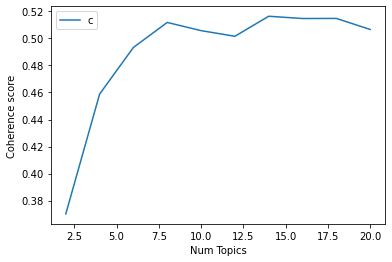

In [18]:
x = range(start, limit, step)
plt.plot(x, mallet_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
topic = 2
for score in mallet_coherence_values:
    print("Topic: {}, coherence: {}".format(topic, score))
    topic+=2

Topic: 2, coherence: 0.37014309495008313
Topic: 4, coherence: 0.45879824768757693
Topic: 6, coherence: 0.4933407536142955
Topic: 8, coherence: 0.5118194195710286
Topic: 10, coherence: 0.5057638728094805
Topic: 12, coherence: 0.5015800031410623
Topic: 14, coherence: 0.5164045924517551
Topic: 16, coherence: 0.5147207217595362
Topic: 18, coherence: 0.5147900420234301
Topic: 20, coherence: 0.5066328449057975


In [23]:
model_name = "../models/LDA/TechDofication.mr.LDA.mallet.raw.t4.pkl"
joblib.dump(mallet_model_list[3], model_name)

['../models/original_data_topics_8.pk1']